In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go

In [99]:
df = pd.read_csv('EDUCABIZ.csv')
df

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias)
0,Jan,100 + Centro de Estudos de Murça,https://centrodeestudosdemurca.educabiz.com,49.0,0.0,31.0,14.0,0.0,78.0,0.0,0.0,0.0
1,Jan,8Tempos-Associação Cultural,https://8tempos.educabiz.com,0.0,0.0,94.0,108.0,0.0,0.0,0.0,0.0,0.0
2,Jan,ABLA,https://abla.educabiz.com,411.0,104.0,152.0,1988.0,3.0,490.0,0.0,5.0,0.0
3,Jan,Abrigo Infantil das Laranjeiras - SCMSJM,https://abrigoinfantildaslaranjeiras.educabiz.com,87.0,0.0,0.0,217.0,18.0,193.0,0.0,0.0,0.0
4,Jan,Academia CIPE,https://eborlandia.educabiz.com,0.0,0.0,144.0,93.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4640,Ago,Sonho Audaz,https://sonhoaudaz.educabiz.com,77.0,46.0,38.0,353.0,NaN,340.0,2278.0,NaN,NaN
4641,Ago,Colégio Mundo do Colibri,https://mundo-colibri.educabiz.com,141.0,25.0,63.0,411.0,NaN,60.0,358.0,NaN,NaN
4642,Ago,Zebra,https://zebra.educabiz.com,1.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN
4643,Ago,Simplio,https://simplio.educabiz.com,NaN,NaN,54.0,196.0,NaN,NaN,NaN,NaN,NaN


# Quick Data Cleaning

In [100]:
df.describe()

,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias)
count,4473.000000,4377.000000,4196.000000,4473.000000,3849.000000,4234.000000,3480.000000,3093.000000,3099.000000
mean,96.223564,14.053233,69.923975,506.964230,4.073006,195.168399,1121.737069,0.468154,1.590190
std,92.322106,20.208209,129.981332,685.107988,11.202011,218.902311,1481.479556,1.643533,14.727321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,1.000000,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,76.000000,7.000000,18.000000,258.000000,0.000000,153.000000,726.000000,0.000000,0.000000
75%,131.000000,19.000000,90.000000,686.000000,3.000000,283.750000,1789.250000,0.000000,0.000000
max,764.000000,216.000000,1854.000000,8357.000000,259.000000,2718.000000,14502.000000,33.000000,442.000000


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4645 entries, 0 to 4644
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   month                        4645 non-null   object 
 1   escola                       4645 non-null   object 
 2   slug                         4645 non-null   object 
 3   tutores                      4473 non-null   float64
 4   second_tutor                 4377 non-null   float64
 5   docs_fiscais (15_dias)       4196 non-null   float64
 6   mensagens (7_dias)           4473 non-null   float64
 7   atividades (7_dias)          3849 non-null   float64
 8   relatorios_diarios (7_dias)  4234 non-null   float64
 9   avaliacoes (7_dias)          3480 non-null   float64
 10  menus (7_dias)               3093 non-null   float64
 11  eventos (15_dias)            3099 non-null   float64
dtypes: float64(9), object(3)
memory usage: 435.6+ KB


In [102]:
# Missing values
df.isnull().sum() / df.shape[0] * 100

month                           0.000000
escola                          0.000000
slug                            0.000000
tutores                         3.702906
second_tutor                    5.769645
docs_fiscais (15_dias)          9.666308
mensagens (7_dias)              3.702906
atividades (7_dias)            17.136706
relatorios_diarios (7_dias)     8.848224
avaliacoes (7_dias)            25.080732
menus (7_dias)                 33.412271
eventos (15_dias)              33.283100
dtype: float64

In [103]:
df['month'].isna().sum()

0

In [104]:
# Let´s take a look to some missing values
df[df['tutores'].isna()]

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias)
3826,Ago,Creche Olhos de Água,https://scmaolhosdeagua.educabiz.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3827,Ago,Infantário do LNEC,https://lnec.educabiz.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3828,Ago,CEJI Gondomar,https://cejigondomar.educabiz.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3831,Ago,Tribo Verde,https://triboverde.educabiz.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3832,Ago,Creche de S. Roque,https://crechesroque.educabiz.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4624,Ago,Funny Center,https://funnycenter.educabiz.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4628,Ago,sabiUs,https://sabius.educabiz.com,NaN,NaN,74.0,788.0,NaN,NaN,NaN,NaN,NaN
4632,Ago,Pio XII,https://pioxii.educabiz.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4639,Ago,DNA – Dance N’ Arts School,https://dna.educabiz.com,NaN,NaN,15.0,25.0,NaN,NaN,NaN,NaN,NaN


In [105]:
# Missing Values is equal to 0 so let´s replace all the missing values by 0
df.fillna(0,inplace=True)
df.isnull().sum()

month                          0
escola                         0
slug                           0
tutores                        0
second_tutor                   0
docs_fiscais (15_dias)         0
mensagens (7_dias)             0
atividades (7_dias)            0
relatorios_diarios (7_dias)    0
avaliacoes (7_dias)            0
menus (7_dias)                 0
eventos (15_dias)              0
dtype: int64

In [106]:
# Let´s change the data type where the columns are 'float64' to 'int32'
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].astype('int32') 

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4645 entries, 0 to 4644
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   month                        4645 non-null   object
 1   escola                       4645 non-null   object
 2   slug                         4645 non-null   object
 3   tutores                      4645 non-null   int32 
 4   second_tutor                 4645 non-null   int32 
 5   docs_fiscais (15_dias)       4645 non-null   int32 
 6   mensagens (7_dias)           4645 non-null   int32 
 7   atividades (7_dias)          4645 non-null   int32 
 8   relatorios_diarios (7_dias)  4645 non-null   int32 
 9   avaliacoes (7_dias)          4645 non-null   int32 
 10  menus (7_dias)               4645 non-null   int32 
 11  eventos (15_dias)            4645 non-null   int32 
dtypes: int32(9), object(3)
memory usage: 272.3+ KB


In [108]:
df['month'].value_counts()

month
Ago     819
Jul     788
Jan     782
Mai     755
Abri    754
Mar     747
Name: count, dtype: int64

In [109]:
df['escola'].value_counts()

escola
Morango Mágico                            12
Educa - Centro de Estudos                 12
Escola Inglesa                            12
Get it Instituto e Explicações Línguas    12
Creche BebéCresce                         12
                                          ..
Brainclick                                 1
Brighton Learning Centre                   1
CAIDI                                      1
Cantinho do Jubas                          1
Rota do Saber                              1
Name: count, Length: 888, dtype: int64

# Numeric Data
* Let´s Take a look to the data distribution and relashionship between our data

In [110]:
# Let´s create a column called 'total_interacoes'. I t will be the sum of every numeric column, just to be our 'y'
df['interacoes_totais'] = df.iloc[:,3:12].sum(axis=1)
df.head()

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias),interacoes_totais
0,Jan,100 + Centro de Estudos de Murça,https://centrodeestudosdemurca.educabiz.com,49,0,31,14,0,78,0,0,0,172
1,Jan,8Tempos-Associação Cultural,https://8tempos.educabiz.com,0,0,94,108,0,0,0,0,0,202
2,Jan,ABLA,https://abla.educabiz.com,411,104,152,1988,3,490,0,5,0,3153
3,Jan,Abrigo Infantil das Laranjeiras - SCMSJM,https://abrigoinfantildaslaranjeiras.educabiz.com,87,0,0,217,18,193,0,0,0,515
4,Jan,Academia CIPE,https://eborlandia.educabiz.com,0,0,144,93,0,0,0,0,0,237


In [111]:
# Let´s create a column called 'dimension'.
df['dimensao'] = df['tutores'] + df['second_tutor'] + df['mensagens (7_dias)']
df.head()

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias),interacoes_totais,dimensao
0,Jan,100 + Centro de Estudos de Murça,https://centrodeestudosdemurca.educabiz.com,49,0,31,14,0,78,0,0,0,172,63
1,Jan,8Tempos-Associação Cultural,https://8tempos.educabiz.com,0,0,94,108,0,0,0,0,0,202,108
2,Jan,ABLA,https://abla.educabiz.com,411,104,152,1988,3,490,0,5,0,3153,2503
3,Jan,Abrigo Infantil das Laranjeiras - SCMSJM,https://abrigoinfantildaslaranjeiras.educabiz.com,87,0,0,217,18,193,0,0,0,515,304
4,Jan,Academia CIPE,https://eborlandia.educabiz.com,0,0,144,93,0,0,0,0,0,237,93


In [112]:
# Let´s see the use of each KPI on the schools with a dimention of 0
dimensao_0 = df[df['dimensao'] == 0]
dimensao_0.iloc[:,3:].sum()

tutores                           0
second_tutor                      0
docs_fiscais (15_dias)          213
mensagens (7_dias)                0
atividades (7_dias)              17
relatorios_diarios (7_dias)      47
avaliacoes (7_dias)            1822
menus (7_dias)                   12
eventos (15_dias)                 4
interacoes_totais              2115
dimensao                          0
dtype: int64

In [113]:
dimensao_0['escola'].value_counts()

escola
Creche BebéCresce                                11
Royal School of Languages                         6
CVP - Moncarapacho-Fuseta                         6
Darwin School Santarém                            6
Educa - Centro de Estudos                         6
                                                 ..
Santa Casa da Misericórdia do Crato               1
Santa Casa da Misericórdia de Vagos               1
Santa Casa da Misericórdia de Olhão               1
Santa Casa da Misericórdia de Armação de Pêra     1
Pio XII                                           1
Name: count, Length: 197, dtype: int64

In [114]:
dimensao_0.iloc[:,0:][(dimensao_0.iloc[:,3:] != 0).any(axis=1)]

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias),interacoes_totais,dimensao
136,Jan,Casa da Palmeira,https://casadapalmeira.educabiz.com,0,0,0,0,0,4,0,0,0,4,0
544,Jan,Jardim-Escola João de Deus | Urgeiriça,https://urgeirica-escolasjoaodeus.educabiz.com,0,0,0,0,4,2,0,0,0,6,0
605,Jan,Nuclisol - Vila Real,https://nuclisolvilareal.educabiz.com,0,0,0,0,0,22,0,0,0,22,0
666,Jan,Pensar e Saber,https://pensar-e-saber.educabiz.com,0,0,5,0,0,0,0,0,0,5,0
781,Jan,Zebra,https://zebra.educabiz.com,0,0,27,0,0,0,0,0,0,27,0
811,Mar,CAPA,https://capa.educabiz.com,0,0,0,0,1,0,63,0,0,64,0
842,Mar,"Creche ""A Colmeia""",https://colmeia.educabiz.com,0,0,0,0,0,10,0,0,0,10,0
899,Mar,Jardim-Escola João de Deus | Urgeiriça,https://urgeirica-escolasjoaodeus.educabiz.com,0,0,0,0,1,9,494,0,0,504,0
1366,Mar,Caderno Mágico,https://cadernomagico.educabiz.com,0,0,172,0,0,0,0,0,0,172,0
1535,Abri,Centro de Estudos Professora Joca,https://professorajoca.educabiz.com,0,0,0,0,0,0,0,0,1,1,0


In [115]:
# Perform division while handling division by zero
#df['docs_fiscais (15_dias)'] = np.where(df['dimensao'] == 0, 0, df['docs_fiscais (15_dias)'] / df['dimensao'])
#df['atividades (7_dias)'] = np.where(df['dimensao'] == 0, 0, df['atividades (7_dias)'] / df['dimensao'])
#df['relatorios_diarios (7_dias)'] = np.where(df['dimensao'] == 0, 0, df['relatorios_diarios (7_dias)'] / df['dimensao'])
#df['avaliacoes (7_dias)'] = np.where(df['dimensao'] == 0, 0, df['avaliacoes (7_dias)'] / df['dimensao'])
#df['menus (7_dias)'] = np.where(df['dimensao'] == 0, 0, df['menus (7_dias)'] / df['dimensao'])
#df['eventos (15_dias)'] = np.where(df['dimensao'] == 0, 0, df['eventos (15_dias)'] / df['dimensao'])
#df['interacoes_totais'] = np.where(df['dimensao'] == 0, 0, df['interacoes_totais'] / df['dimensao'])

In [116]:
# Let´s Create a Column Called 'ratio_interacoes_dimensão'
#df['ratio_int_dimensao'] = df.apply(
    #lambda row: row['interacoes_totais'] / row['dimensao'] if row['dimensao'] != 0 else 0,
    #axis=1)

In [117]:
df.head()

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias),interacoes_totais,dimensao
0,Jan,100 + Centro de Estudos de Murça,https://centrodeestudosdemurca.educabiz.com,49,0,31,14,0,78,0,0,0,172,63
1,Jan,8Tempos-Associação Cultural,https://8tempos.educabiz.com,0,0,94,108,0,0,0,0,0,202,108
2,Jan,ABLA,https://abla.educabiz.com,411,104,152,1988,3,490,0,5,0,3153,2503
3,Jan,Abrigo Infantil das Laranjeiras - SCMSJM,https://abrigoinfantildaslaranjeiras.educabiz.com,87,0,0,217,18,193,0,0,0,515,304
4,Jan,Academia CIPE,https://eborlandia.educabiz.com,0,0,144,93,0,0,0,0,0,237,93


__Data Distribution__

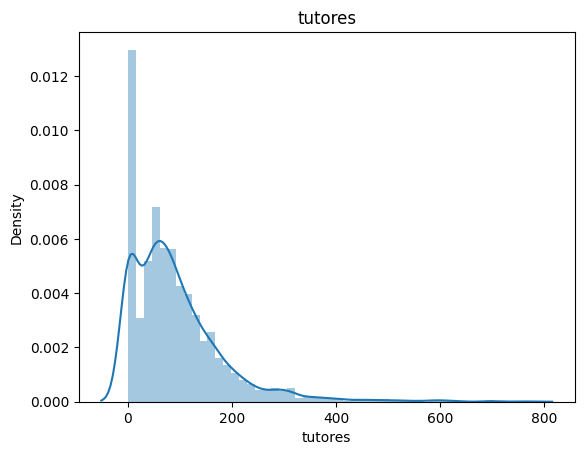

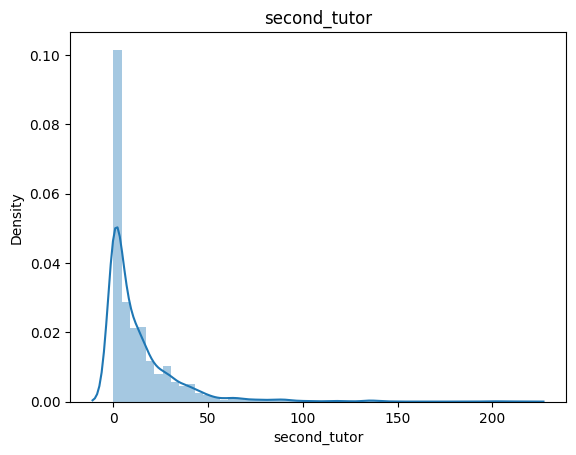

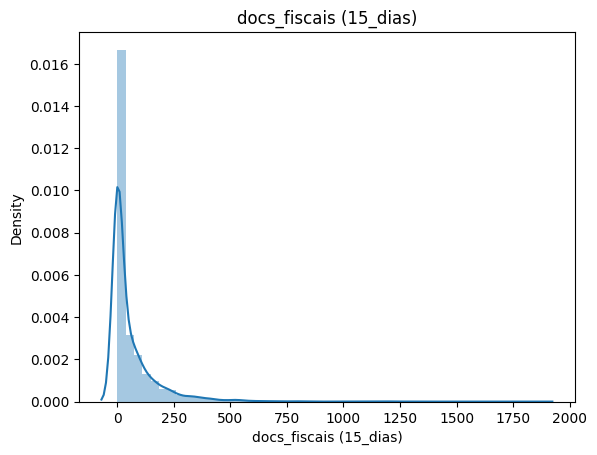

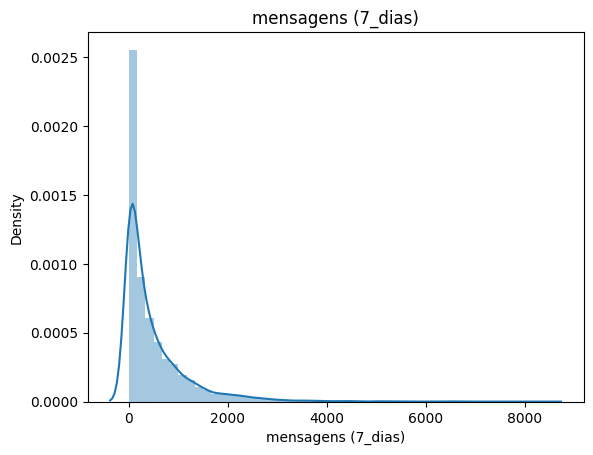

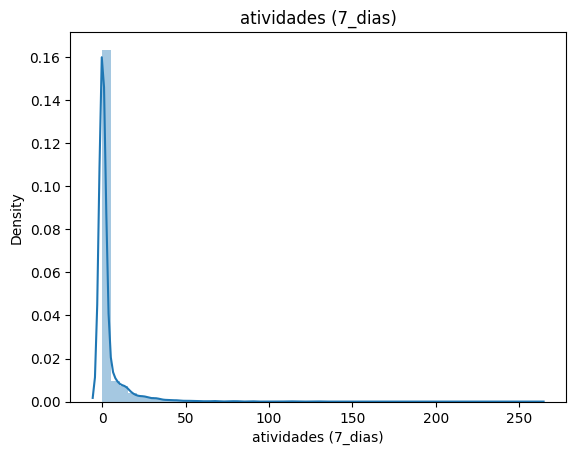

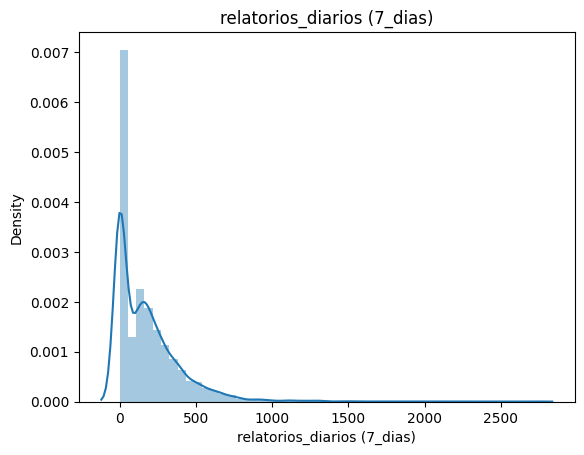

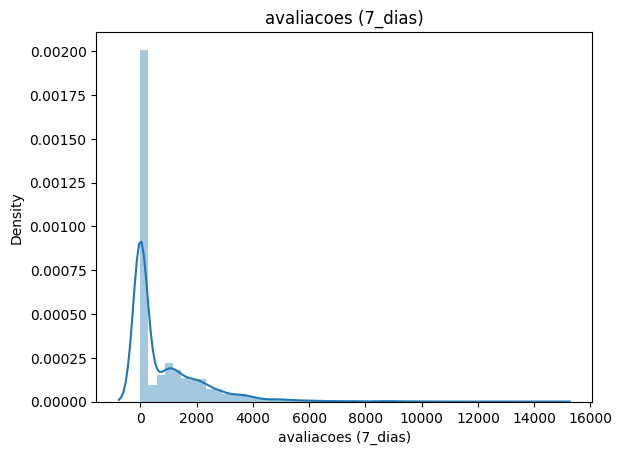

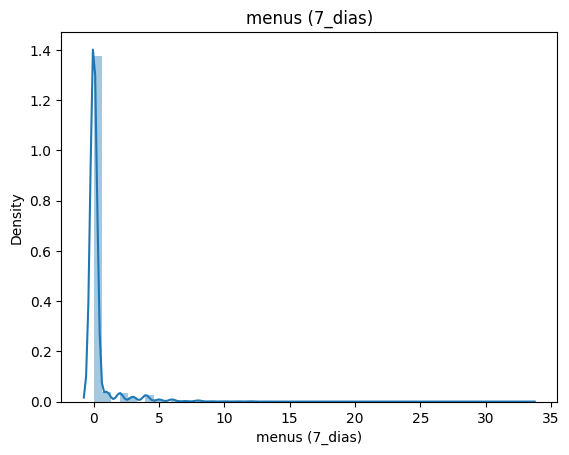

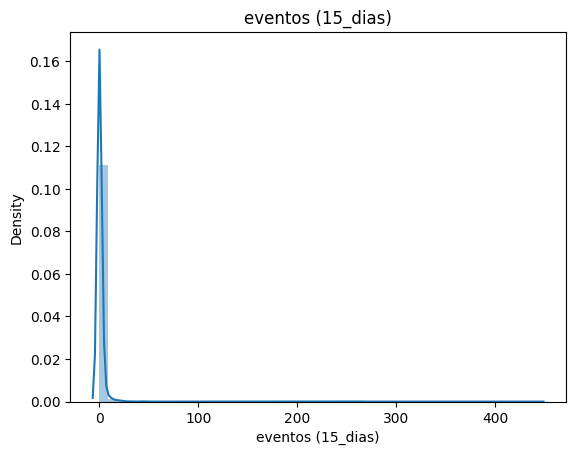

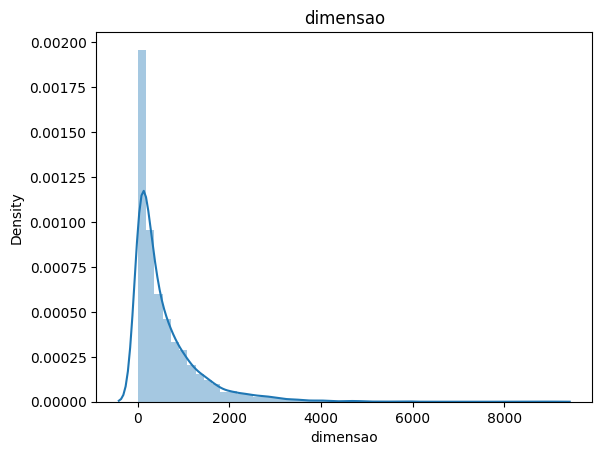

In [118]:
# Distplot for data with type = 'int32'
for col in df.columns:
    if df[col].dtype == 'int32':
        sns.distplot(df[col])
        plt.title(col)
        plt.show()

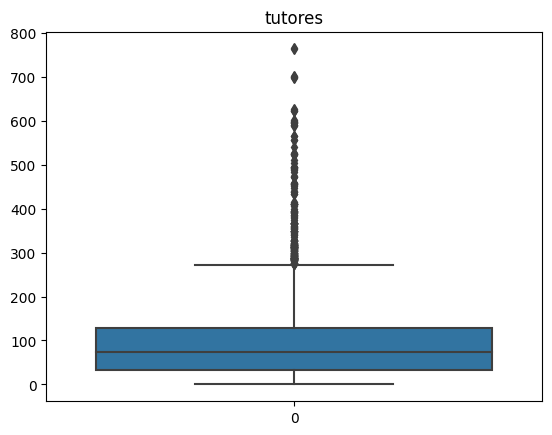

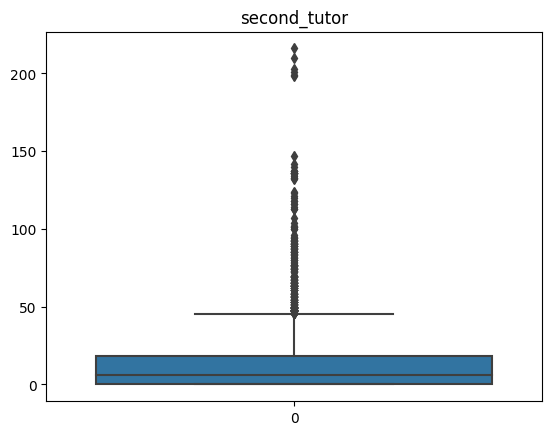

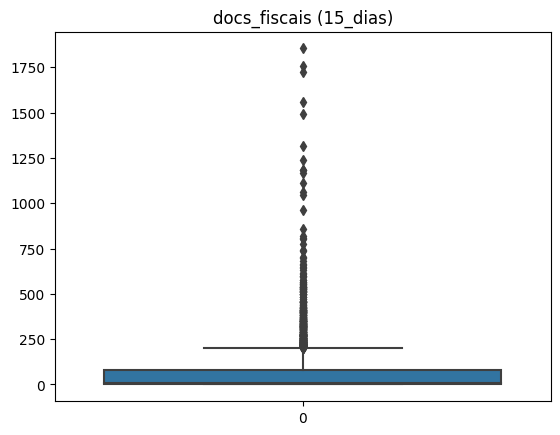

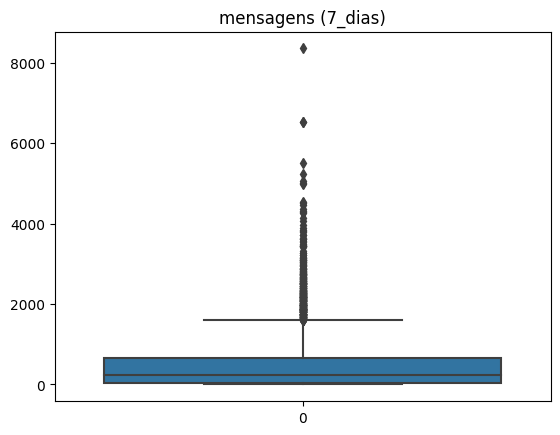

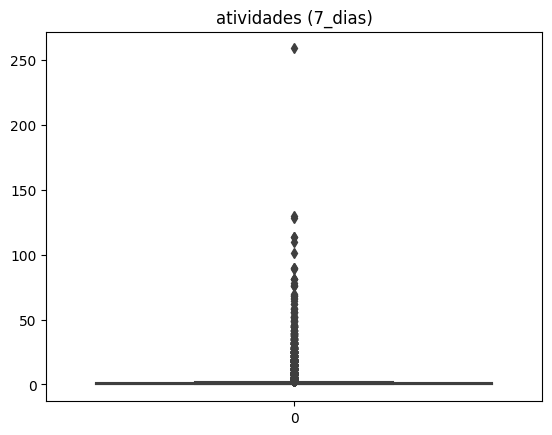

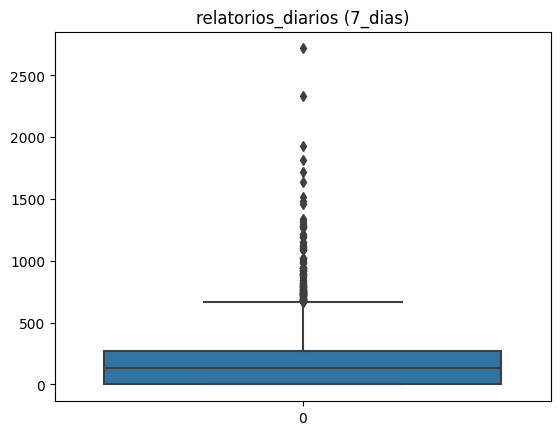

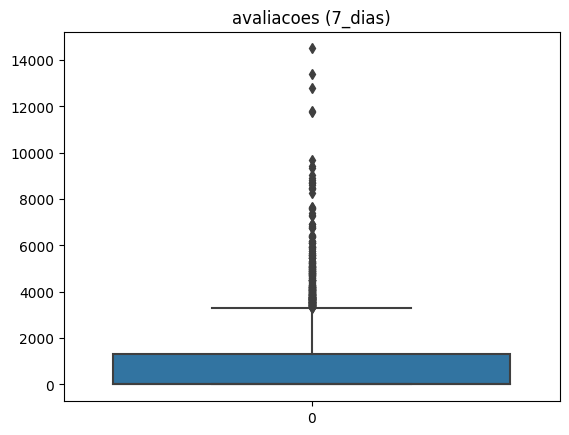

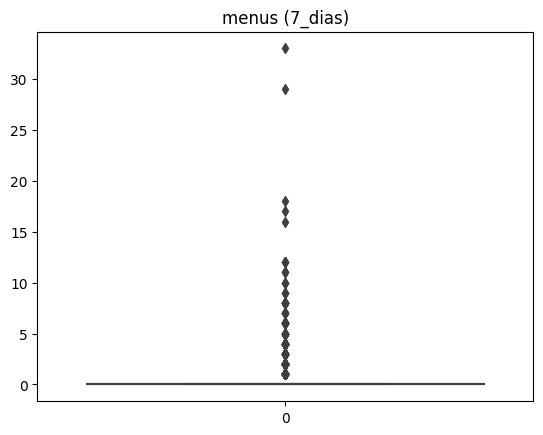

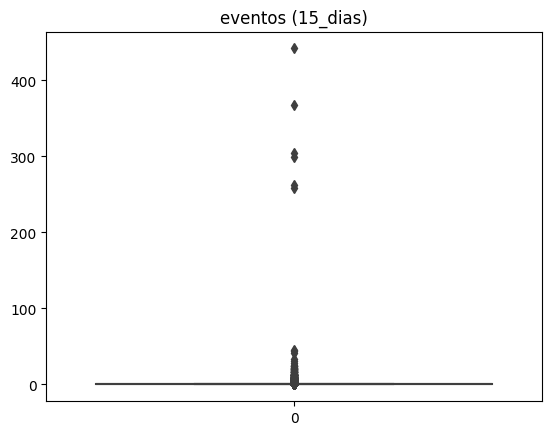

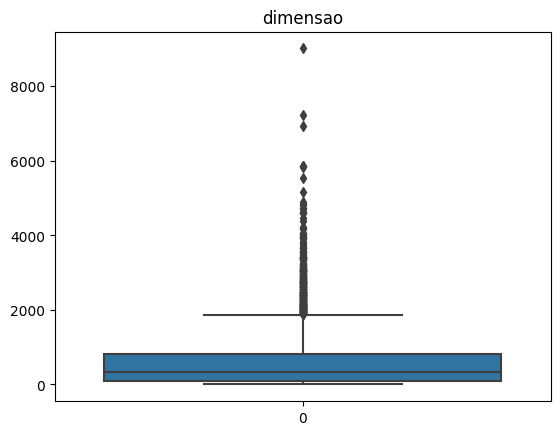

In [119]:
for col in df.columns:
    if df[col].dtype == 'int32':
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

As we can see from all the previous plots it is possibel to conclude that the following KPI's has the greatest variance:
* Tutores
* Relatorios Diarios
* Avaliacoes

__Relashionship Between Variabels__

<Axes: >

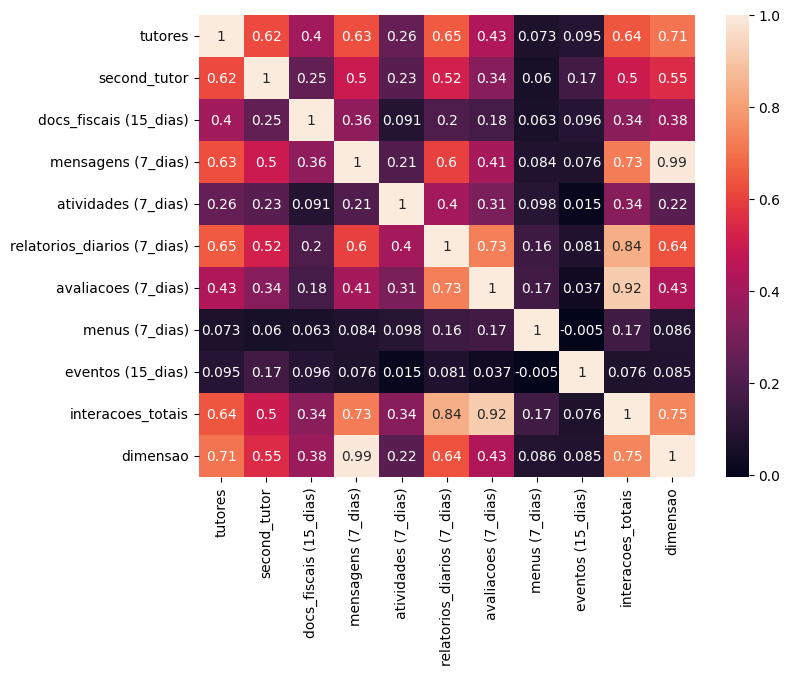

In [120]:
corr = df.iloc[:,3:].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)

By the heatmpa it is possibel to understand:
* interacoes totais has a great correlation with avaliacoes (0.92), relatorios diarios (0.84), mensagens (0.73) and has a good interaction with tutores (0.64). The previous variables appears to have more meaning to this analyse
* relatorios diarios has a great correlation with avalaicoes!!!!!
* relatorios diarios has a good correlation with tutores and mensagens
* tutores has a good correlation with relatorios diarios, mensagens and second tutores
* mensagens has a good correlation with tutores and relatorios diarios

# Escola
* Let´s try to understand wich 'escola' has the lowest interaction with the plataform EDUCABIZ

In [121]:
df.head()

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias),interacoes_totais,dimensao
0,Jan,100 + Centro de Estudos de Murça,https://centrodeestudosdemurca.educabiz.com,49,0,31,14,0,78,0,0,0,172,63
1,Jan,8Tempos-Associação Cultural,https://8tempos.educabiz.com,0,0,94,108,0,0,0,0,0,202,108
2,Jan,ABLA,https://abla.educabiz.com,411,104,152,1988,3,490,0,5,0,3153,2503
3,Jan,Abrigo Infantil das Laranjeiras - SCMSJM,https://abrigoinfantildaslaranjeiras.educabiz.com,87,0,0,217,18,193,0,0,0,515,304
4,Jan,Academia CIPE,https://eborlandia.educabiz.com,0,0,144,93,0,0,0,0,0,237,93


In [122]:
print('There are {} schools'.format(df['escola'].nunique()))

There are 888 schools


__Total Interactions__

In [123]:
# Schools Witht the less number of 'interacoes_totais'
escola_int = df.groupby('escola').agg(interacoes=('interacoes_totais','sum')).sort_values(by='interacoes').reset_index()
escola_int

,escola,interacoes
0,O Mundo de Mia,0
1,Centro de Estudos Eureka,0
2,O Jardim da Isabel,0
3,O Gatinho,0
4,Crescer no Campo - Multi-Serviços Lda.,0
...,...,...
883,JARDIMCOOPE / SOLINORTE,56278
884,CSP do Senhor da Vera Cruz do Candal,58533
885,A Cidade dos Brinquedos,60806
886,Casa Vera Cruz,63557


In [124]:
print('There are {} schools with 0 interactions which represent {}% of all the schools'.format(escola_int[escola_int['interacoes']==0]['escola'].nunique(),
                                                                                               round(escola_int[escola_int['interacoes']==0]['escola'].nunique() / escola_int['escola'].nunique() *100),0))

There are 130 schools with 0 interactions which represent 15% of all the schools


# EDUCABIZ Features Less Used

In [125]:
df.head()

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias),interacoes_totais,dimensao
0,Jan,100 + Centro de Estudos de Murça,https://centrodeestudosdemurca.educabiz.com,49,0,31,14,0,78,0,0,0,172,63
1,Jan,8Tempos-Associação Cultural,https://8tempos.educabiz.com,0,0,94,108,0,0,0,0,0,202,108
2,Jan,ABLA,https://abla.educabiz.com,411,104,152,1988,3,490,0,5,0,3153,2503
3,Jan,Abrigo Infantil das Laranjeiras - SCMSJM,https://abrigoinfantildaslaranjeiras.educabiz.com,87,0,0,217,18,193,0,0,0,515,304
4,Jan,Academia CIPE,https://eborlandia.educabiz.com,0,0,144,93,0,0,0,0,0,237,93


In [126]:
# Let´s create a dataframe with the sum of interactions by each column (KPI)
kpi_use = pd.DataFrame(df.iloc[:,3:12].sum()).reset_index().rename(columns={'index':'KPI',
                                                                   0:'interacoes'}).sort_values(by='interacoes')
kpi_use

,KPI,interacoes
7,menus (7_dias),1448
8,eventos (15_dias),4928
4,atividades (7_dias),15677
1,second_tutor,61511
2,docs_fiscais (15_dias),293401
0,tutores,430408
5,relatorios_diarios (7_dias),826343
3,mensagens (7_dias),2267651
6,avaliacoes (7_dias),3903645


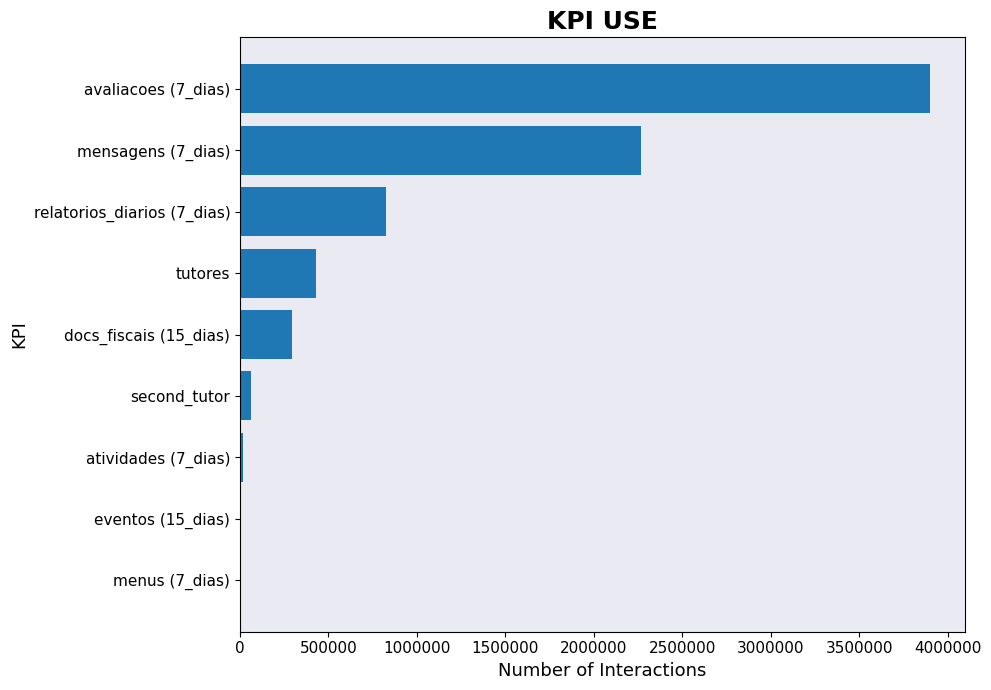

In [127]:
plt.figure(figsize=(10,7))

plt.gca().set_facecolor('#EAEAF2')

plt.barh(kpi_use['KPI'],kpi_use['interacoes'])

plt.title('KPI USE', fontweight='bold', fontsize=18)

plt.xlabel('Number of Interactions', fontsize=13)
plt.xticks(fontsize=11)
plt.gca().ticklabel_format(axis='x', style='plain')

plt.ylabel('KPI',fontsize=13)
plt.yticks(fontsize=11)


    
plt.tight_layout()

plt.show()

As we can see from the previous plot the feature less used at the EDUCABIZ Plataform are the following ones:
1. menus
2. eventos
3. atividades

# Cluster Analyse
* Let´s Do A Cluster Analyse To classify each school based on their interactions

In [128]:
df.head()

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias),interacoes_totais,dimensao
0,Jan,100 + Centro de Estudos de Murça,https://centrodeestudosdemurca.educabiz.com,49,0,31,14,0,78,0,0,0,172,63
1,Jan,8Tempos-Associação Cultural,https://8tempos.educabiz.com,0,0,94,108,0,0,0,0,0,202,108
2,Jan,ABLA,https://abla.educabiz.com,411,104,152,1988,3,490,0,5,0,3153,2503
3,Jan,Abrigo Infantil das Laranjeiras - SCMSJM,https://abrigoinfantildaslaranjeiras.educabiz.com,87,0,0,217,18,193,0,0,0,515,304
4,Jan,Academia CIPE,https://eborlandia.educabiz.com,0,0,144,93,0,0,0,0,0,237,93


## Data Preprocessing

In [129]:
# Let's create a copy of the original dataset
df1 = df.copy()
df1.head()

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias),interacoes_totais,dimensao
0,Jan,100 + Centro de Estudos de Murça,https://centrodeestudosdemurca.educabiz.com,49,0,31,14,0,78,0,0,0,172,63
1,Jan,8Tempos-Associação Cultural,https://8tempos.educabiz.com,0,0,94,108,0,0,0,0,0,202,108
2,Jan,ABLA,https://abla.educabiz.com,411,104,152,1988,3,490,0,5,0,3153,2503
3,Jan,Abrigo Infantil das Laranjeiras - SCMSJM,https://abrigoinfantildaslaranjeiras.educabiz.com,87,0,0,217,18,193,0,0,0,515,304
4,Jan,Academia CIPE,https://eborlandia.educabiz.com,0,0,144,93,0,0,0,0,0,237,93


### Dealing With Outliers - Isolation Forest

In [130]:
# Model building
#model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.01), max_features=1.0)
#model.fit(df1.iloc[:,3:])

In [131]:
# Adding 'scores' and 'anomaly' colums to df
#scores=model.decision_function(df1.iloc[:,3:])
#anomaly=model.predict(df1.iloc[:,3:])

#df1['scores']=scores
#df1['anomaly']=anomaly

#anomaly = df1.loc[df1['anomaly']==-1]
#anomaly_index = list(anomaly.index)
#print('Total number of outliers is:', len(anomaly))


In [132]:
# dropping outliers
#df1 = df1.drop(anomaly_index, axis = 0).reset_index(drop=True)

In [133]:
#df1.shape

In [134]:
#df1.head()

In [135]:
# dropping columns that we don't need any more
#df1.drop(['scores', 'anomaly'], axis = 1, inplace =True)

### Feature Scalling

In [136]:
df1.iloc[:,3:]

,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias),interacoes_totais,dimensao
0,49,0,31,14,0,78,0,0,0,172,63
1,0,0,94,108,0,0,0,0,0,202,108
2,411,104,152,1988,3,490,0,5,0,3153,2503
3,87,0,0,217,18,193,0,0,0,515,304
4,0,0,144,93,0,0,0,0,0,237,93
...,...,...,...,...,...,...,...,...,...,...,...
4640,77,46,38,353,0,340,2278,0,0,3132,476
4641,141,25,63,411,0,60,358,0,0,1058,577
4642,1,0,4,4,0,0,0,0,0,9,5
4643,0,0,54,196,0,0,0,0,0,250,196


In [137]:
sc = StandardScaler()
df2=sc.fit_transform(df1.iloc[:,3:])
df2

array([[-0.47256269, -0.66591087, -0.25682411, ..., -0.0880384 ,
        -0.73579871, -0.70672423],
       [-1.00291792, -0.66591087,  0.24620604, ..., -0.0880384 ,
        -0.72116375, -0.64684303],
       [ 3.44557184,  4.56385652,  0.70931317, ..., -0.0880384 ,
         0.71842801,  2.5401676 ],
       ...,
       [-0.99209434, -0.66591087, -0.47240846, ..., -0.0880384 ,
        -0.8153153 , -0.78390445],
       [-1.00291792, -0.66591087, -0.07317818, ..., -0.0880384 ,
        -0.69774782, -0.52974201],
       [-0.29938547,  0.33981363, -0.21690108, ..., -0.0880384 ,
        -0.67677106, -0.44856972]])

### PCA

In [138]:
# Applying PCA
pca = PCA(n_components=4)
pca_results = pca.fit_transform(df2)
print ('Cumulative variance explained: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Cumulative variance explained: 75.47%


In [139]:
# Crete a dataframe with pca_results
pca_results = pd.DataFrame(pca_results,columns=['PC1','PC2','PC3','PC4'])
pca_results

,PC1,PC2,PC3,PC4
0,-1.706869,0.032587,-0.018819,-0.059279
1,-1.855711,0.253871,-0.073410,0.209469
2,5.435417,1.426660,0.217079,2.892758
3,-0.789470,-0.659623,0.201318,-0.651171
4,-1.787520,0.390470,-0.081716,0.364793
...,...,...,...,...
4640,1.088844,-0.431694,0.209245,-0.624777
4641,-0.214106,0.703225,-0.148187,-0.040964
4642,-2.139215,-0.067138,0.015091,-0.091440
4643,-1.814336,0.189482,-0.109873,0.097570


In [140]:
# Variance Explained By Each PCA
explained_variance = pca.explained_variance_
explained_variance

array([5.13412525, 1.23295539, 0.98875009, 0.94739592])

In [141]:
# Get a DataFrame With The Orignal Data and PCA's
df.reset_index(inplace=True)
df.drop(columns='index')
df.reset_index(inplace=True)

pca_results.reset_index(inplace=True)
pca_results

df_pca1 = pd.merge(df,pca_results, on='index', how='left')
df_pca1.drop(columns=['index'],inplace=True)
df_pca1.drop(columns=['level_0'],inplace=True)

<Axes: >

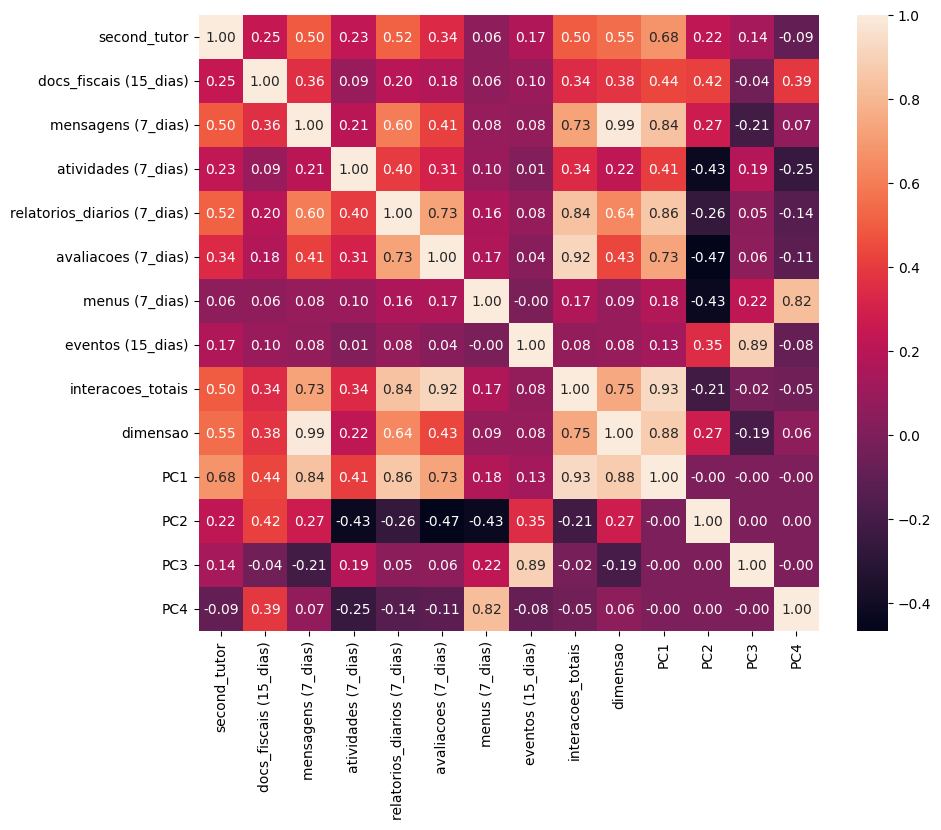

In [142]:
# Pearson Correlation
corr = df_pca1.iloc[:,4:].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot = True, fmt = '.2f')

### Determine The K (number of clusters)

In [143]:
pca_results.drop(columns=['index'],inplace=True)
pca_results

,PC1,PC2,PC3,PC4
0,-1.706869,0.032587,-0.018819,-0.059279
1,-1.855711,0.253871,-0.073410,0.209469
2,5.435417,1.426660,0.217079,2.892758
3,-0.789470,-0.659623,0.201318,-0.651171
4,-1.787520,0.390470,-0.081716,0.364793
...,...,...,...,...
4640,1.088844,-0.431694,0.209245,-0.624777
4641,-0.214106,0.703225,-0.148187,-0.040964
4642,-2.139215,-0.067138,0.015091,-0.091440
4643,-1.814336,0.189482,-0.109873,0.097570


In [144]:
df2 = np.array(pca_results)
df2

array([[-1.70686863e+00,  3.25868271e-02, -1.88193132e-02,
        -5.92792892e-02],
       [-1.85571100e+00,  2.53871089e-01, -7.34097110e-02,
         2.09469161e-01],
       [ 5.43541732e+00,  1.42665958e+00,  2.17079202e-01,
         2.89275838e+00],
       ...,
       [-2.13921542e+00, -6.71376662e-02,  1.50911738e-02,
        -9.14402852e-02],
       [-1.81433552e+00,  1.89481891e-01, -1.09873377e-01,
         9.75697204e-02],
       [-1.26343274e+00,  4.75748556e-01, -5.07856068e-03,
        -6.01446855e-02]])

__Elbow Method__

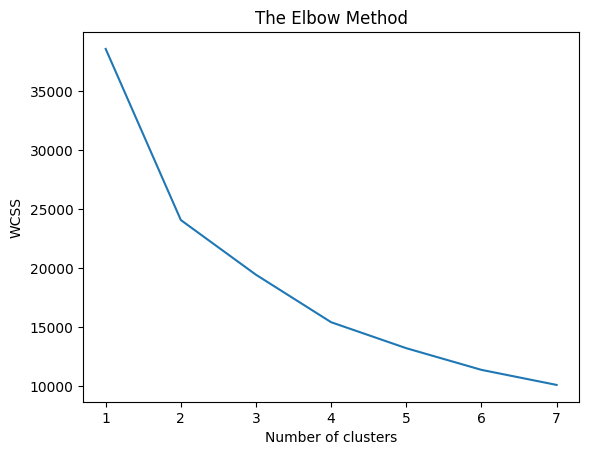

In [145]:
# Elbow Method
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=7,random_state=0)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,8),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As we can see by the dendogram and by the Elbow Method There are 6 different clusters

### K-Means Clustering

In [146]:
# Training the K-Means Model
np.random.seed(42)
df_kmeans = df2.copy()
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_kmeans)
y_kmeans

array([0, 0, 1, ..., 0, 0, 0])

In [147]:
# We called the df, that's why we need to refer to previous df to add cluster numbers
df_kmeans = pca_results.copy()
# Checking number of items in clusters and creating 'Cluster' column
df_kmeans['Cluster'] = y_kmeans
df_kmeans['Cluster'].value_counts()

Cluster
0    2857
2    1491
1     297
Name: count, dtype: int64

<Axes: xlabel='PC2', ylabel='PC1'>

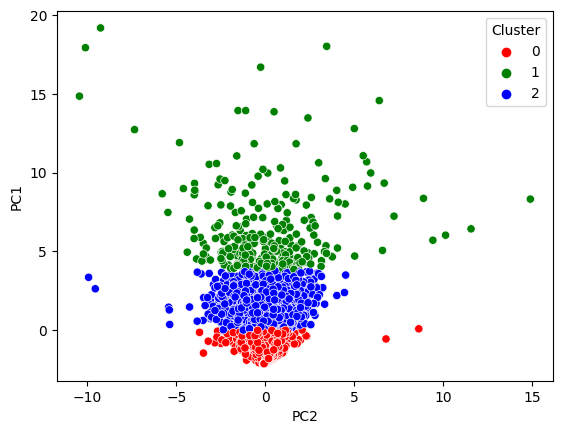

In [148]:
sns.scatterplot(data = df_kmeans, y='PC1',x='PC2',hue='Cluster', palette=['red','green','blue','orange','black','purple','brown'])

<Axes: xlabel='PC3', ylabel='PC1'>

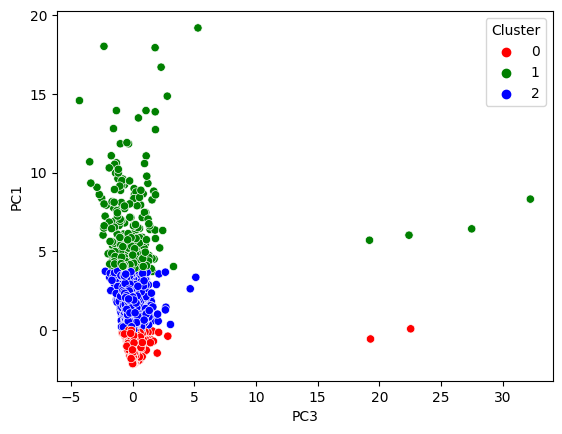

In [149]:
sns.scatterplot(data = df_kmeans, y='PC1',x='PC3',hue='Cluster', palette=['red','green','blue','orange','black','purple','brown'])

In [150]:
# We called the df, that's why we need to refer to previous df to add cluster numbers
df_kmeans = df1.copy()
# Checking number of items in clusters and creating 'Cluster' column
df_kmeans['Cluster'] = y_kmeans
df_kmeans['Cluster'].value_counts()

Cluster
0    2857
2    1491
1     297
Name: count, dtype: int64

<Axes: xlabel='dimensao', ylabel='interacoes_totais'>

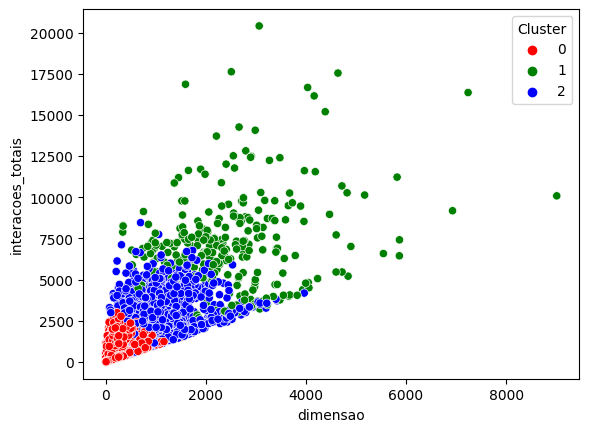

In [151]:
sns.scatterplot(data = df_kmeans, y='interacoes_totais',x='dimensao',hue='Cluster', palette=['red','green','blue','orange','black','purple','brown'])

<Axes: xlabel='avaliacoes (7_dias)', ylabel='interacoes_totais'>

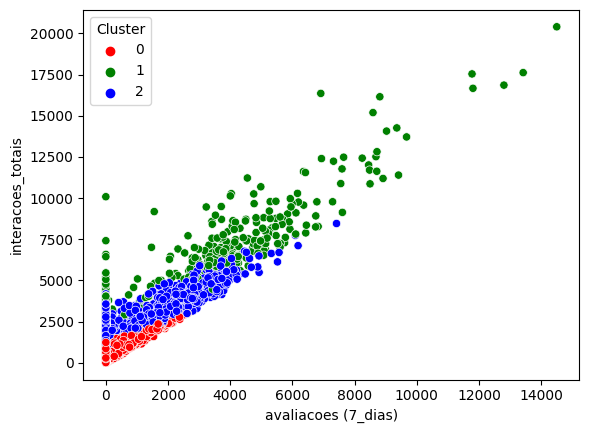

In [152]:
sns.scatterplot(data = df_kmeans, y='interacoes_totais',x='avaliacoes (7_dias)',hue='Cluster', palette=['red','green','blue','orange','black','purple','brown'])

<Axes: xlabel='relatorios_diarios (7_dias)', ylabel='interacoes_totais'>

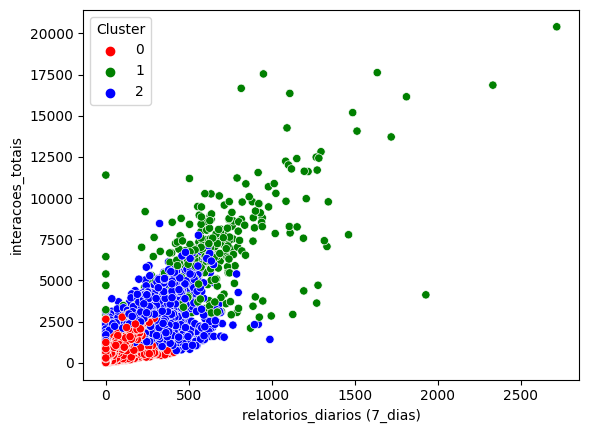

In [153]:
sns.scatterplot(data = df_kmeans, y='interacoes_totais',x='relatorios_diarios (7_dias)',hue='Cluster', palette=['red','green','blue','orange','black','purple','brown'])

<Axes: xlabel='mensagens (7_dias)', ylabel='interacoes_totais'>

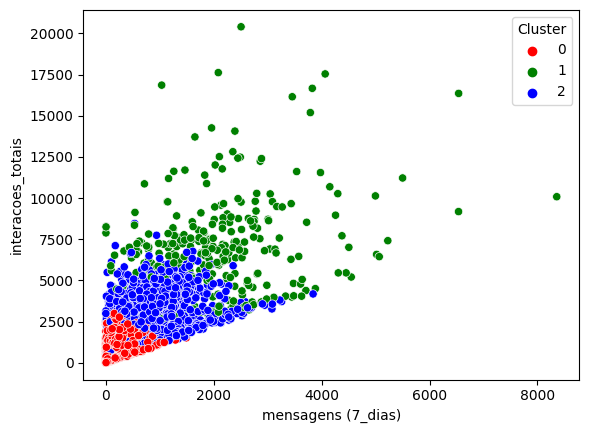

In [154]:
sns.scatterplot(data = df_kmeans, y='interacoes_totais',x='mensagens (7_dias)',hue='Cluster', palette=['red','green','blue','orange','black','purple','brown'])

<Axes: xlabel='tutores', ylabel='interacoes_totais'>

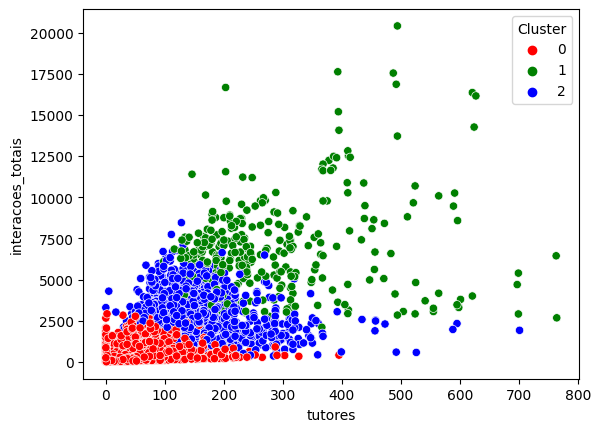

In [155]:
sns.scatterplot(data = df_kmeans, y='interacoes_totais',x='tutores',hue='Cluster', palette=['red','green','blue','orange','black','purple','brown'])

<Axes: xlabel='second_tutor', ylabel='interacoes_totais'>

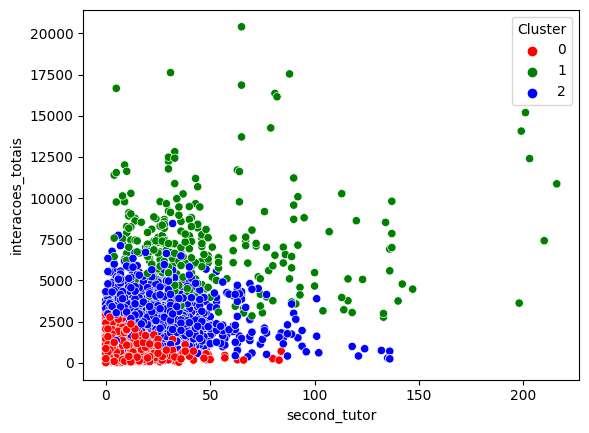

In [156]:
sns.scatterplot(data = df_kmeans, y='interacoes_totais',x='second_tutor',hue='Cluster', palette=['red','green','blue','orange','black','purple','brown'])

<Axes: xlabel='docs_fiscais (15_dias)', ylabel='interacoes_totais'>

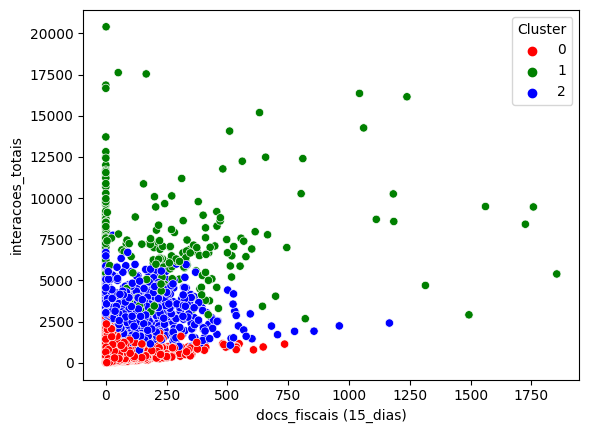

In [157]:
sns.scatterplot(data = df_kmeans, y='interacoes_totais',x='docs_fiscais (15_dias)',hue='Cluster', palette=['red','green','blue','orange','black','purple','brown'])

### Hierarchical Clustering

In [158]:
# Training the Model
np.random.seed(42)
df_AgglomerativeC = df2.copy()
AgglomerativeC = AgglomerativeClustering(n_clusters=3,affinity = 'euclidean', linkage = 'ward')
y_AgglomerativeC = AgglomerativeC.fit_predict(df_AgglomerativeC)

In [159]:
# We called the df, that's why we need to refer to previous df to add cluster numbers
df_AgglomerativeC = pca_results.copy()
# Checking number of items in clusters and creating 'Cluster' column
df_AgglomerativeC['Cluster'] = y_AgglomerativeC
df_AgglomerativeC['Cluster'].value_counts()

Cluster
1    2854
2    1510
0     281
Name: count, dtype: int64

In [160]:
df_AgglomerativeC

,PC1,PC2,PC3,PC4,Cluster
0,-1.706869,0.032587,-0.018819,-0.059279,1
1,-1.855711,0.253871,-0.073410,0.209469,1
2,5.435417,1.426660,0.217079,2.892758,2
3,-0.789470,-0.659623,0.201318,-0.651171,1
4,-1.787520,0.390470,-0.081716,0.364793,1
...,...,...,...,...,...
4640,1.088844,-0.431694,0.209245,-0.624777,2
4641,-0.214106,0.703225,-0.148187,-0.040964,2
4642,-2.139215,-0.067138,0.015091,-0.091440,1
4643,-1.814336,0.189482,-0.109873,0.097570,1


<Axes: xlabel='PC2', ylabel='PC1'>

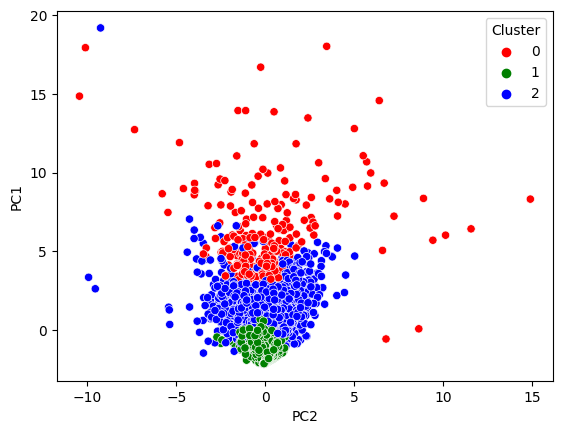

In [161]:
sns.scatterplot(data = df_AgglomerativeC, y='PC1',x='PC2',hue='Cluster', palette=['red','green','blue','orange','black','purple','brown'])

# Model Evaluation

* Note: Let´s Use the Kmeans

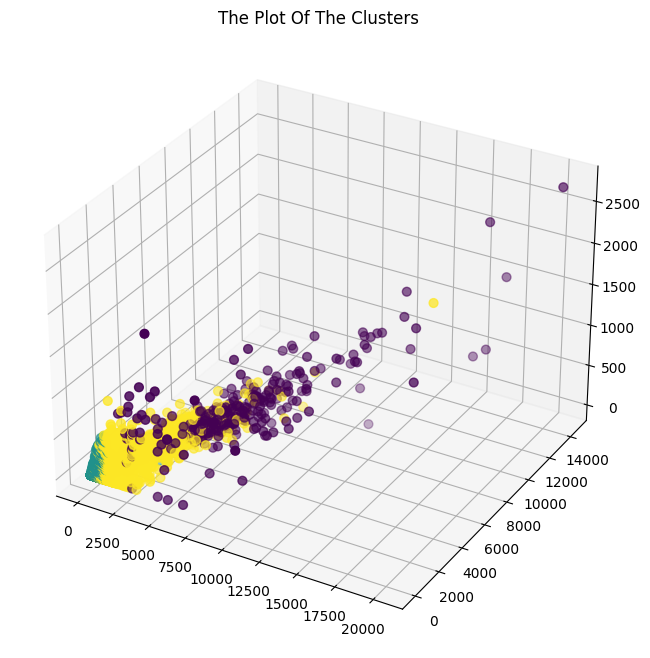

In [162]:
#Plotting the clusters
x = df_kmeans["interacoes_totais"]
y = df_kmeans["avaliacoes (7_dias)"]
z = df_kmeans["relatorios_diarios (7_dias)"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df_AgglomerativeC["Cluster"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

In [163]:
df_kmeans.drop(columns=['level_0','index'],inplace=True)
df_kmeans

KeyError: "['level_0', 'index'] not found in axis"

<Axes: xlabel='Cluster', ylabel='interacoes_totais'>

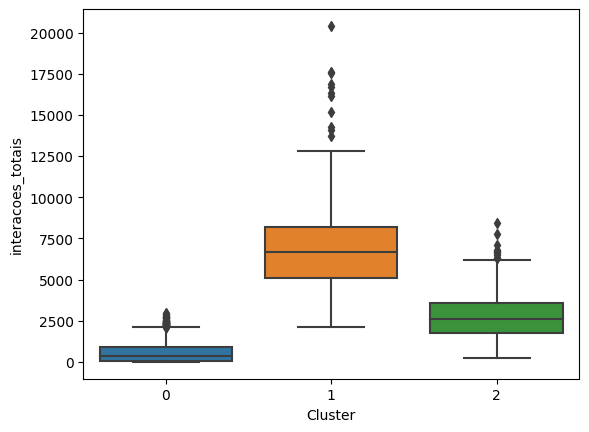

In [ ]:
df_kmeans['Cluster'] = df_kmeans['Cluster'].astype(str)
sns.boxplot(data=df_kmeans, x='Cluster', y='interacoes_totais')

<Axes: xlabel='Cluster', ylabel='count'>

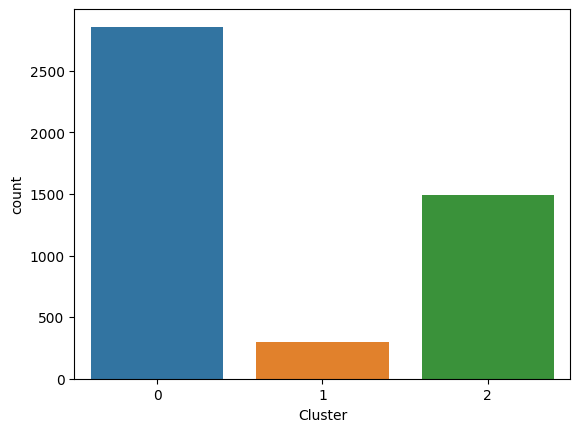

In [164]:
sns.countplot(x=df_kmeans['Cluster'])

In [165]:
df_kmeans.iloc[:,3:].groupby('Cluster').agg(n_escolas=('Cluster','count'),
                                              tutores=('tutores','mean'),
                                              second_tutor=('second_tutor','mean'),
                                              docs_fiscais=('docs_fiscais (15_dias)','mean'),
                                              mensagens=('mensagens (7_dias)','mean'),
                                              atividades=('atividades (7_dias)','mean'),
                                              relatorios_diarios=('relatorios_diarios (7_dias)','mean'),
                                              avaliacoes=('avaliacoes (7_dias)','mean'),
                                              menus=('menus (7_dias)','mean'),
                                              eventos=('eventos (15_dias)','mean'),
                                              interacoes_totais=('interacoes_totais','mean'),
                                              interacoes_totais_max=('interacoes_totais','max'),
                                              interacoes_totais_min=('interacoes_totais','min')).sort_values(by='interacoes_totais',ascending=False)

,n_escolas,tutores,second_tutor,docs_fiscais,mensagens,atividades,relatorios_diarios,avaliacoes,menus,eventos,interacoes_totais,interacoes_totais_max,interacoes_totais_min
Cluster,,,,,,,,,,,,,
1,297,291.700337,48.609428,217.410774,2073.845118,14.063973,682.501684,3653.535354,0.757576,7.626263,6990.050505,20400,2104
2,1491,140.753186,21.922200,85.467471,818.568075,5.544601,288.959759,1396.965124,0.503018,0.931590,2759.615023,8456,238
0,2857,46.870844,5.036052,35.491075,150.939447,1.131607,67.483724,257.497375,0.165558,0.445922,565.061603,2991,0


##